In [1]:
import pandas as pd
import matplotlib.pyplot as plt  # For plotting
from matplotlib import cm 

In [2]:
df = pd.read_csv('./files/smooth_interpolation_100_seeds.csv')
train_data = pd.read_csv('./files/smooth_interpolation_train_data.csv')

In [3]:
y_hat_df = df.drop(df.columns[0], axis=1) #removing the x_test from the dataset

In [4]:
y_hat_df['Y_hat_median'] = y_hat_df.median(axis=1) #adding the median of the experiments

In [5]:
low_quantile = 0.1
up_quantile = 0.9

y_hat_df['Y_hat_0.1_quantile'] = y_hat_df.quantile(low_quantile,axis = 1) #calculating the 10% quantile
y_hat_df['Y_hat_0.9_quantile'] = y_hat_df.quantile(up_quantile,axis = 1) #calculating the 90% quantile

In [6]:
fontsize= 16
ticksize = 14
figsize = (10, 6)
params = {'font.family':'serif',
    "figure.figsize":figsize,
    'figure.dpi': 80,
    'figure.edgecolor': 'k',
    'font.size': fontsize,
    'axes.labelsize': fontsize,
    'axes.titlesize': fontsize,
    'xtick.labelsize': ticksize,
    'ytick.labelsize': ticksize
}
plt.rcParams.update(params)

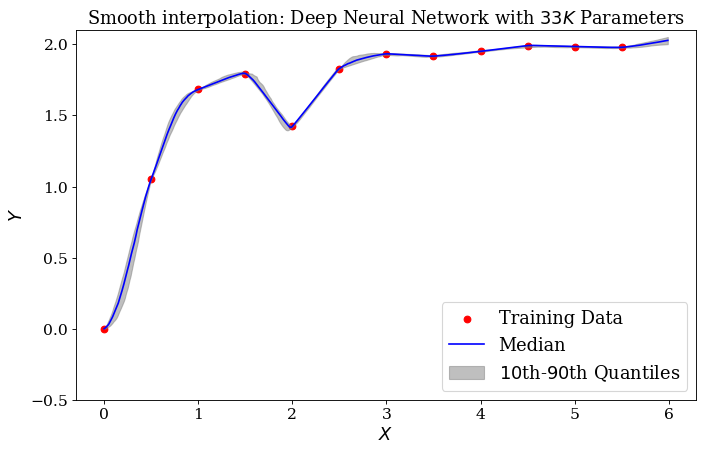

In [8]:
plt.scatter(train_data["X_train"],train_data["Y_train"], color = "r", label = "Training Data")
plt.plot(df["X_test"],y_hat_df['Y_hat_median'], color = "b", label = "Median")
plt.fill_between(df["X_test"], y_hat_df['Y_hat_0.1_quantile'],  y_hat_df['Y_hat_0.9_quantile'], alpha=0.5, color = "gray", label = "$10$th-$90$th Quantiles" )
plt.xlabel(r"$X$")
plt.ylabel(r"$Y$")
plt.ylim(-0.5, 2.1)  
plt.legend(loc='best')
plt.title("Smooth interpolation: Deep Neural Network with $33K$ Parameters ")
plt.savefig('smooth_interpolation_100_seeds.pdf')
